In [1]:
import cv2

from pathlib import Path

import matplotlib.pyplot as plt

from src.utils.image_preprocessing import image_processing
from src.utils.line_digitilizer import digitilize_single_line, digitilize_multi_line

(26634, 1647, 3)


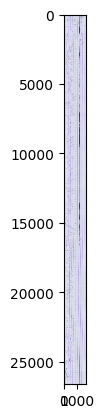

In [2]:
img_full = cv2.imread(str(Path('data/well_4_old.jpg')))
print(img_full.shape)
plt.imshow(img_full)

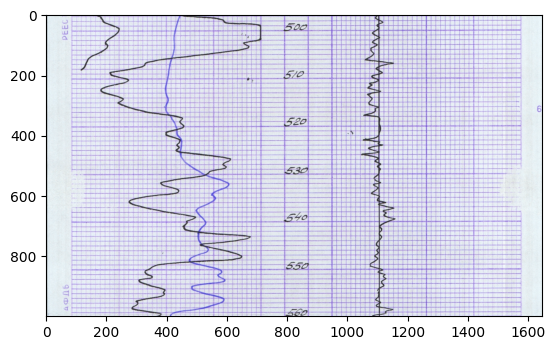

In [3]:
img_crop = img_full[4000:5000, :, :]
plt.imshow(img_crop)

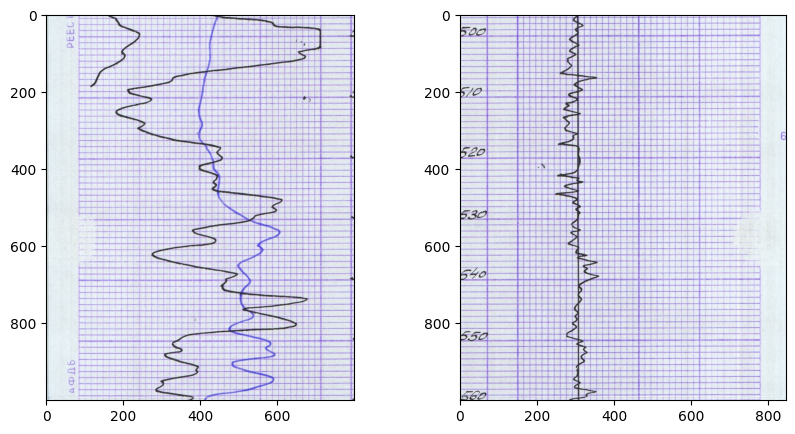

In [4]:
two_plots = img_crop[:, 0:800, :]
single_plot = img_crop[:, 800:, :]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(two_plots)
axs[1].imshow(single_plot)

# Test single processer

(1000, 847, 3)


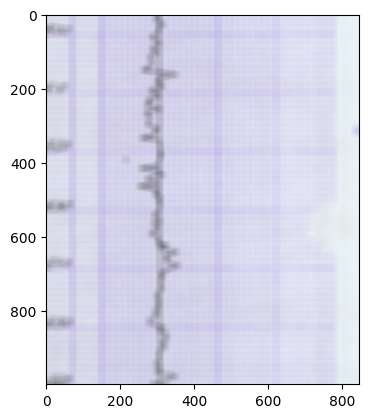

In [5]:
print(single_plot.shape)
filtered_img1 = image_processing(single_plot, filter_kernel_size=3, blur_kernel_size=20, iterations=2)
plt.imshow(filtered_img1)

crop image

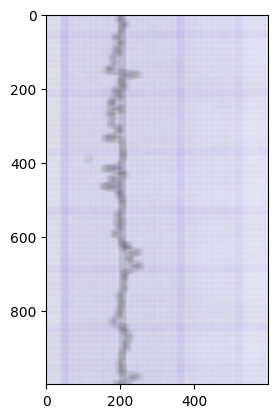

In [6]:
bbox=(100, 0, 700, 999)

filtered_img1_cropped = filtered_img1[bbox[1]:bbox[3], bbox[0]:bbox[2]]
plt.imshow(filtered_img1_cropped)

In [7]:
lbls, x, y = digitilize_single_line(
    filtered_img1_cropped, bbox=bbox,
    depthK=1, depthB=0, mnemonicK=1, mnemonicB=0,
    ad_dbscan_eps=0.03, ad_dbscan_min_samples=5
)

Line detection: 100%|██████████| 999/999 [00:03<00:00, 321.21it/s]


In [8]:
import numpy as np

np.median(np.arange(100))

49.5

In [9]:
filtered_img1_cropped.shape

(999, 600, 3)

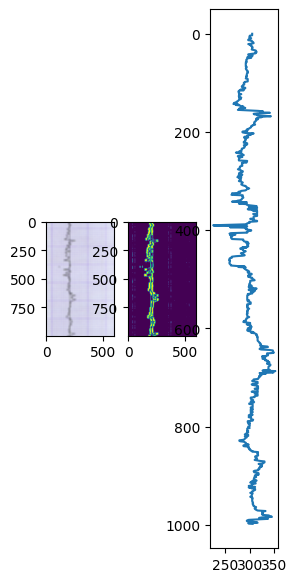

In [10]:
fig, axs = plt.subplots(1,3, figsize=(3, 7))
axs[0].imshow(filtered_img1_cropped)
axs[1].imshow(lbls)
axs[2].invert_yaxis()
axs[2].plot(x, y)

# Two lines

(1000, 800, 3)


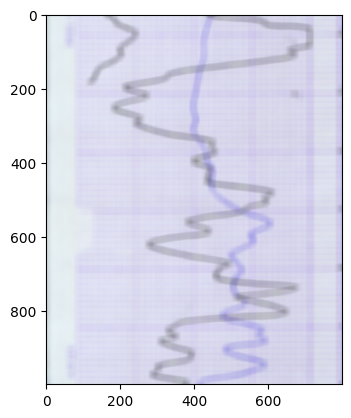

In [11]:
print(two_plots.shape)
filtered_img1 = image_processing(two_plots, filter_kernel_size=3, blur_kernel_size=20, iterations=2)
plt.imshow(filtered_img1)

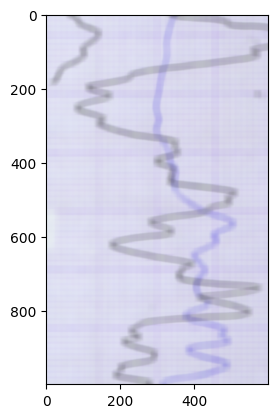

In [12]:
bbox=(100, 0, 700, 999)

filtered_img1_cropped = filtered_img1[bbox[1]:bbox[3], bbox[0]:bbox[2]]
plt.imshow(filtered_img1_cropped)

In [13]:
val, ix = digitilize_multi_line(
    filtered_img1_cropped, bbox=bbox,
    depthK=1, depthB=0, mnemonicK=1, mnemonicB=0,
    ad_dbscan_eps=0.03, ad_dbscan_min_samples=5
)

Line detection: 100%|██████████| 999/999 [00:02<00:00, 345.13it/s]


In [14]:
ix

array([[  0,  55],
       [  0,  56],
       [  0,  57],
       ...,
       [998, 331],
       [998, 332],
       [998, 333]], dtype=int64)